In [1]:
%load_ext pyinstrument
import sys
sys.path.append('/mnt/d/ariel2/code/core/')
import kaggle_support as kgs
import importlib
import matplotlib.pyplot as plt
import numpy as np
import cupy as cp
import ariel_load
import tqdm
import copy

local


In [2]:
#%%pyinstrument
train_data = kgs.load_all_train_data()
test_data = kgs.load_all_test_data()
len(train_data), len(test_data)

(1099, 1)

2554492145


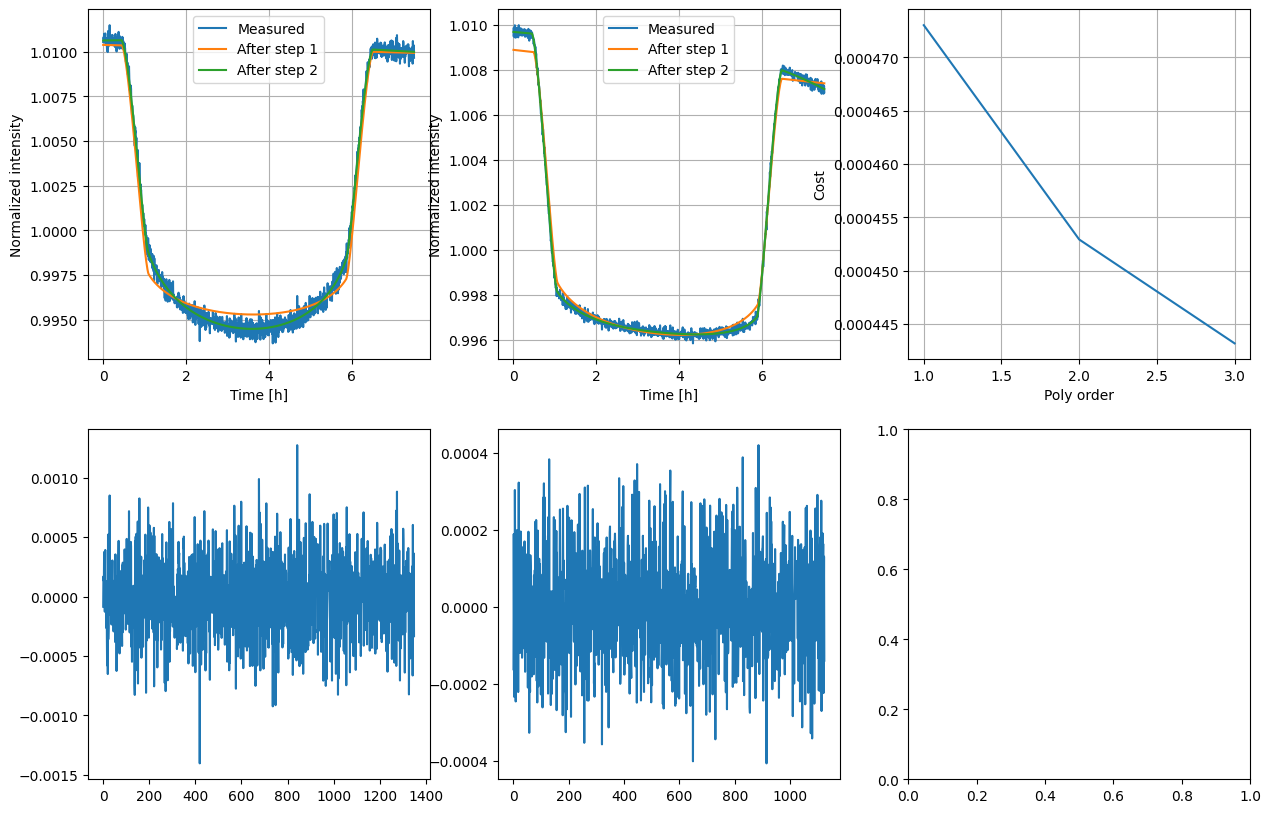

0.995759092187786 0.9895509281013632
[[ 3.46026481e+00  3.46026481e+00 -2.82869710e+00  5.39818665e-02
   8.96278190e+01  3.88966406e-01  1.52502285e-01  1.47185097e-01
   9.16486461e-02  0.00000000e+00  0.00000000e+00]]
[[ 3.47374667e+00  3.46043476e+00 -2.82875629e+00  5.40654285e-02
   8.96324922e+01  3.31431003e-01  1.63775336e-01  2.26297294e-01
   5.78693137e-02 -1.69126213e-02 -3.84138908e-02]]
[[ 3.47292380e+00  3.46041613e+00 -2.82868156e+00  5.44369809e-02
   8.96378349e+01  3.59298061e-01  1.58041984e-01  1.87889988e-01
   6.28525315e-02 -1.17656147e-02 -4.46617024e-02]]
[[ 3.47311625e+00  3.46035992e+00 -2.82862146e+00  5.44818654e-02
   8.96401050e+01  3.76111914e-01  1.52899041e-01  1.64186684e-01
   6.75440970e-02 -1.24438065e-02 -4.42552935e-02]]
{'main': CompoundNamed(comment='.signal.main')}


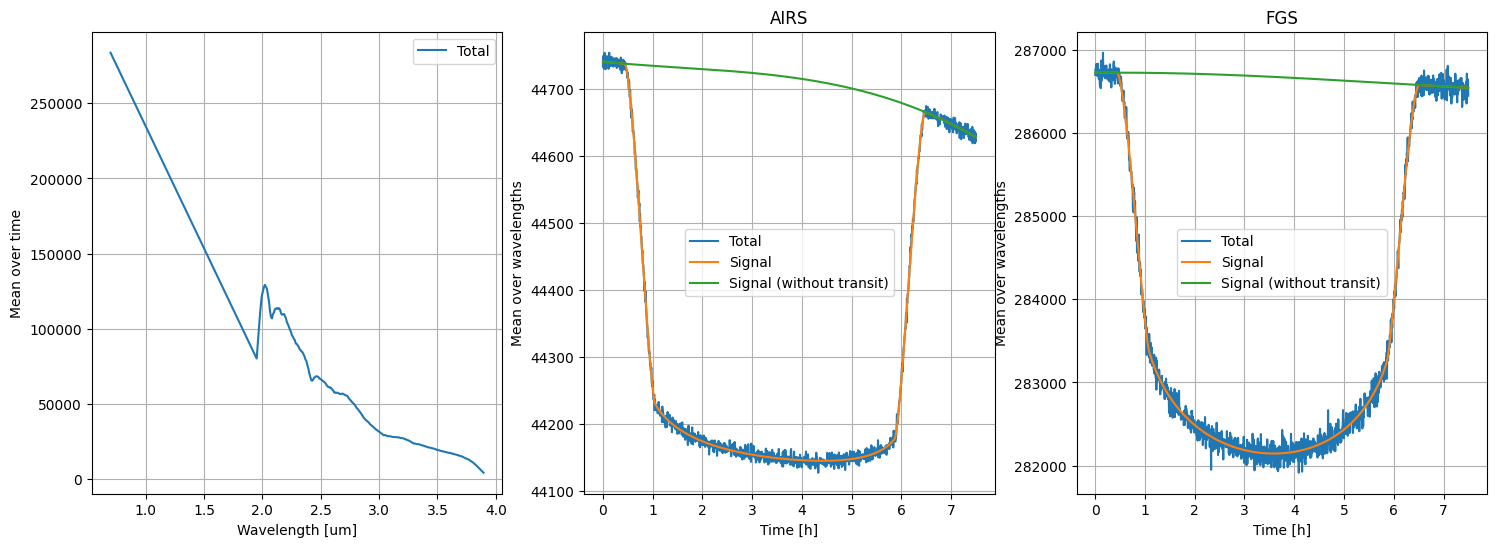

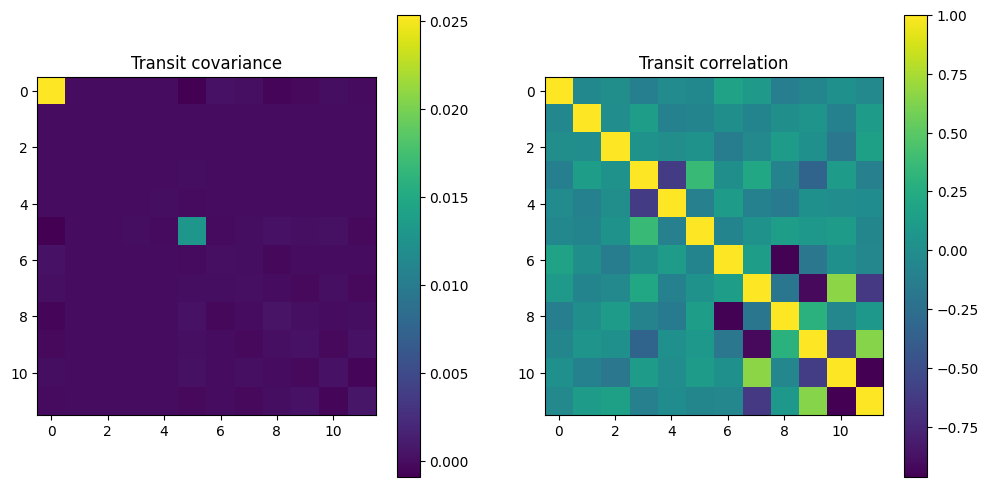

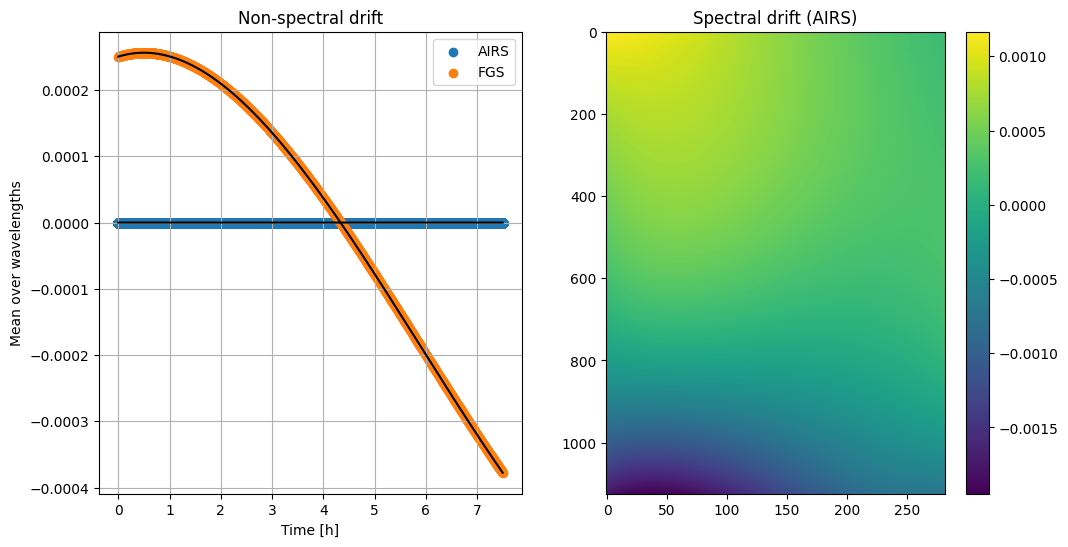

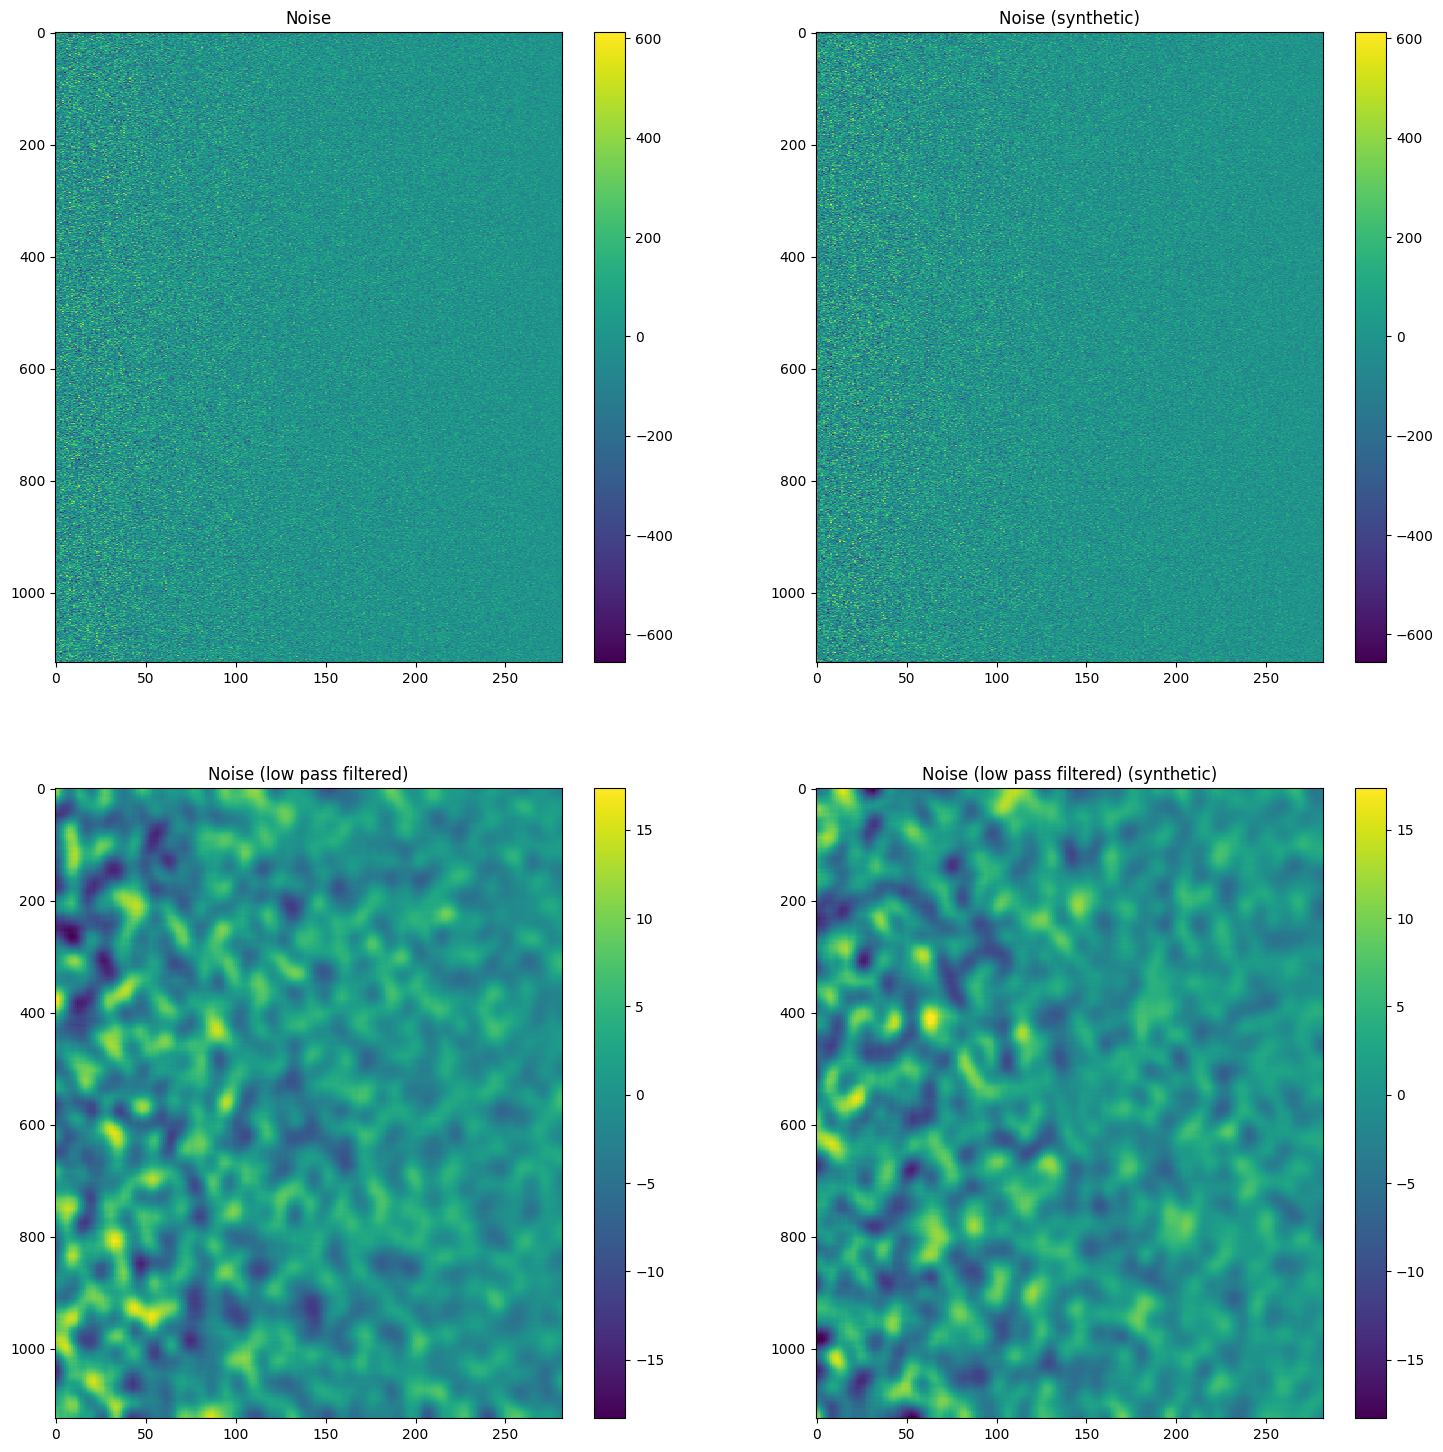

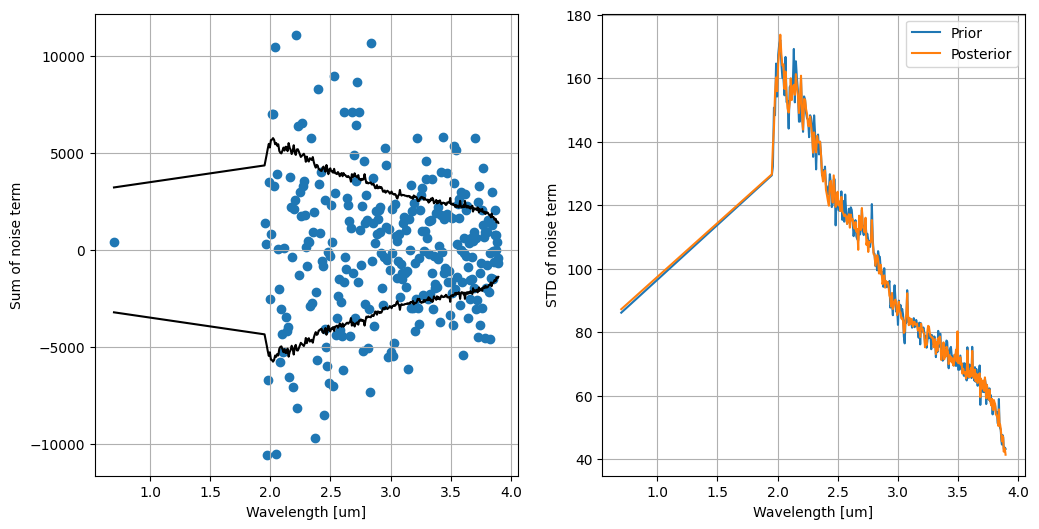

Score:           -12.3788
RMS error FGS:   1253.70690 ppm
mRMS error FGS:  1253.70690 ppm
RMS error AIRS:  1152.06773 ppm
mRMS error AIRS: 1152.06773 ppm
RMS error AIRSv: 156.57138 ppm
mRMS error AIRSv:156.57138 ppm


(-12.378849473044335, 0.0012537069016728304, 0.0011520677271731246)

In [13]:
import gp
import ariel_gp
import ariel_load_FGS
import ariel_model
import ariel_simple
importlib.reload(ariel_load_FGS)
importlib.reload(ariel_load)
kgs.profiling=False
kgs.debugging_mode=1
kgs.sanity_checks_active=False
importlib.reload(gp)
importlib.reload(ariel_gp)
model = ariel_gp.PredictionModel()  
model.run_in_parallel=False
model.model_options.use_training_labels = False
model.starter_model.do_plots = True
model.plot_final = True
model.plot_simple = False
#model.model_options.include_background = False
#model.model_options.n_iter = 4
model.train(train_data)
#model.starter_model.loaders[0].cache_steps = [5]

for ii in range(2):                
    pass
    # model.loaders[ii].apply_full_sensor_corrections.remove_bad_pixels_pca = True                 
    # model.loaders[ii].apply_full_sensor_corrections.remove_bad_pixels_pca_inputs[3] = 10000
    # model.loaders[ii].apply_full_sensor_corrections.remove_bad_pixels_pca_inputs[2] = 10000
    # model.loaders[ii].apply_full_sensor_corrections.remove_bad_pixels_pca_inputs[4] = True
    #model.loaders[ii].apply_pixel_corrections.mask_hot = False
    #model.loaders[ii].apply_pixel_corrections.mask_hot = False
#model.loaders[1].apply_full_sensor_corrections.remove_bad_pixels_pca_inputs[1] = 1
#model.loaders[0].cache_steps = []
#model.starter_model.loaders = model.loaders

model = ariel_model.baseline_model()
starter_model = ariel_simple.SimpleModel()
starter_model.unlock_t0 = True
starter_model.new_solver = False
starter_model.do_plots = True
for ii in range(2):
    starter_model.loaders[ii].apply_pixel_corrections.remove_last_frame = True
    starter_model.loaders[ii].apply_pixel_corrections.new_cosmic_ray_removal = True
    starter_model.loaders[ii].apply_time_binning.add_last_frame=True
model.model.starter_model = starter_model
model.model.starter_model = ariel_simple.SimpleModelChainer(model=starter_model)
model.model.run_in_parallel = False
model=model.model

model.train(train_data)
# model.run_in_parallel = False
# model.plot_final = True

loaders = model.starter_model.loaders
#model.model_options.n_iter = 40
#model.model_options.unregularize_transit = False
#model.model_options.transit_std_scaling = 1.
model.model_options.common_parameters = [1,2,3]
model.plot_final = True
# model.starter_model.new_solver = True
# model.starter_model.unlock_t0 = True
#model.starter_model.transit_param[0].supersample_factor = 50
#loaders[1].noise_scaling = 1e4
#model.model_options.supersample_override[0]=50
#model.model_options.FGS_transit_override = ('linear',1)
#model.model_options.AIRS_transit_override = ('linear',1)
#loaders[0].cache_steps= []
# loaders[0].apply_wavelength_binning = ariel_load_FGS.ApplyWavelengthBinningFGS2()
# loaders[0].apply_wavelength_binning.n_mean_pixels = 0
# loaders[0].apply_pixel_corrections.mask_hot = False
# loaders[0].apply_full_sensor_corrections.inpainting_2d = True
# loaders[0].apply_full_sensor_corrections.restore_invalids = True
# loaders[0].apply_full_sensor_corrections.remove_background_based_on_pixels = True
# old_weights = copy.deepcopy(ariel_load_FGS.FGS_weights)
# ariel_load_FGS.FGS_weights *= 0
# ariel_load_FGS.FGS_weights[0,0] = old_weights[0,0]
#print(ariel_load_FGS.FGS_weights)
#ariel_load_FGS.FGS_weights[3] = 1
#model.model_options.FGS_order = 3
#model.model_options.AIRS_order = 3
#loaders[0].apply_wavelength_binning.options.use_sum = True
# loaders[1].apply_full_sensor_corrections.inpainting_wavelength = False
# loaders[1].apply_pixel_corrections.mask_hot = False
# loaders[1].apply_full_sensor_corrections.use_pca_for_background_removal = False
# loaders[1].apply_full_sensor_corrections.remove_background_based_on_rows = False
# loaders[1].apply_full_sensor_corrections.remove_background_remove_used_rows = False
# loaders[1].apply_wavelength_binning = ariel_load.ApplyWavelengthBinningAIRS2()
# loaders[1].apply_wavelength_binning.make_diagnostic_plots = False
# loaders[1].apply_wavelength_binning.residual_threshold = np.inf
# loaders[1].apply_wavelength_binning.sequential_fit = True


            
#model.loaders[0].cache_steps = [5]
#data = [train_data[[d.planet_id for d in train_data].index(1856672295)]] # ingress and egress obscured
#1349926825
data = train_data[:10]
data = [train_data[817]]
data = [train_data[521]]
data = [train_data[667]]
print(data[0].planet_id)
#data = [train_data[[d.planet_id for d in train_data].index(1124834224)]]
#data = train_data[1003:1004]
#data = [train_data[[d.planet_id for d in train_data].index(2270815333)]] # ingress and egress obscured
data= copy.deepcopy(data)
# for d in data:
#     d.load_to_step(5,model.loaders)
#     #d.transit_params[0].supersample_factor = 50
#     d.transits = d.transits[:1]
#     print(d.transit_params)
#     #d.transit_params = copy.deepcopy(train_data[2].transit_params)
#     #d.transits[0].data[0].data-=5000
    #d.transits[0].data[1].noise_est*=1000
#print('!!!')
#d.transits = d.transits[1:]
#%pyinstrument inferred_data = model.infer(data)
inferred_data = model.infer(data)
kgs.score_metric(inferred_data, data)
# model.starter_model.do_plots = False
# inferred_data_simple = model.starter_model.infer(data)
# kgs.score_metric(inferred_data_simple, data)

In [4]:
%debug

ERROR:root:No traceback has been produced, nothing to debug.


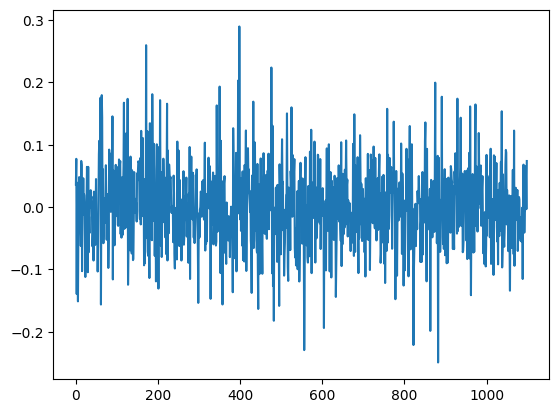

In [5]:
vals =[]
for d in train_data:
    d=copy.deepcopy(d)
    d.transit_params.Rp = 1.
    d.transit_params.u = [0]
    vals.append(d.transit_params.to_x()[2])
plt.plot(vals)

In [6]:
obs = copy.deepcopy(model.results['obs'])
m = copy.deepcopy(model.results['model_mean'])
obs.labels = m.m['signal'].m['main'].m['transit'].get_prediction(obs)
plt.figure()
plt.imshow(obs.export_matrix(True), aspect='auto', interpolation='none')
plt.colorbar()
m.m['signal'].m['main'].m['transit'].transit_params[0][1]

TransitParams(comment='', Rs=2.247923790153632, Ms=1.2871680084049617, Ts=6189.764887902546, Mp=0.3632840122612, e=0.0, w=90.0, Rp=None, P=83.58948272410863, t0=3.4625219026433753, sma=4.939780139813859, i=89.64024315406364, limb_dark='quadratic', u=array([0.15191081, 0.06893059]), expose_e_and_w=False)

In [7]:
m = copy.deepcopy(model)
m.results['model_mean'].clear_all_caches()
m.results['model_samples'].clear_all_caches()
kgs.dill_save(kgs.temp_dir + 'test.pickle', m.results)

In [8]:
# data2 = copy.deepcopy(data)
# data2[0].transits = data2[0].transits[1:]
# inferred_data2 = model.infer(data2)

In [9]:
# plt.figure()
# plt.plot(3*(inferred_data2[0].spectrum - inferred_data[0].spectrum))
# plt.plot(data[0].spectrum-np.mean(data[0].spectrum))
# plt.figure()


In [10]:
# plt.figure()
# plt.plot(data[0].spectrum - inferred_data[0].spectrum)
# plt.figure()
# xx = data[0].spectrum
# plt.plot(xx-kgs.gaussian_2D_filter_with_nans(xx[:,None],[5,0.001])[:,0])
# # plt.plot(np.diff(data[0].spectrum))
# plt.plot((data[0].spectrum - inferred_data[0].spectrum))
# plt.figure()
# plt.scatter(xx-kgs.gaussian_2D_filter_with_nans(xx[:,None],[5,0.001])[:,0], data[0].spectrum - inferred_data2[0].spectrum)
# # plt.figure()
# # plt.scatter(np.diff(data[0].spectrum), (data[0].spectrum - inferred_data[0].spectrum)[:-1])
# # plt.figure()
# # plt.scatter(np.diff(data[0].spectrum,n=2), (data[0].spectrum - inferred_data[0].spectrum)[:-2])

In [11]:
5000/32/32

4.8828125

0.6577098196694454
-6.232814962194473
-6.537998498217581


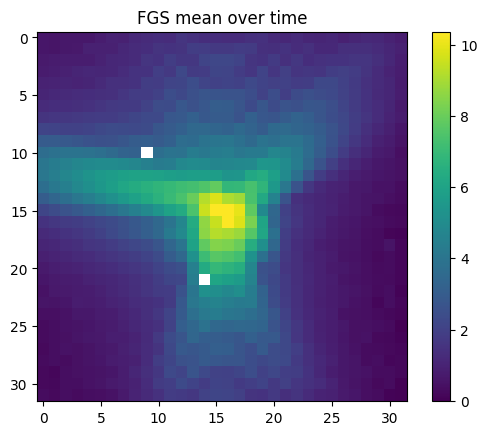

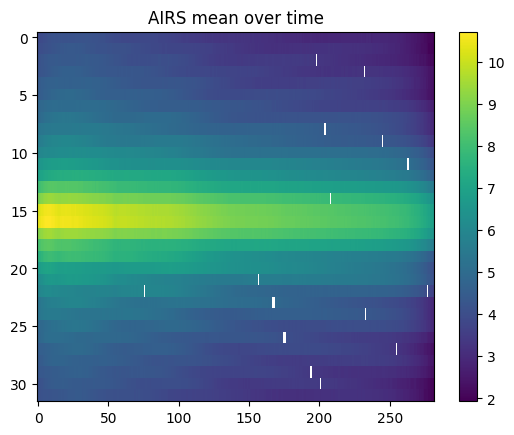

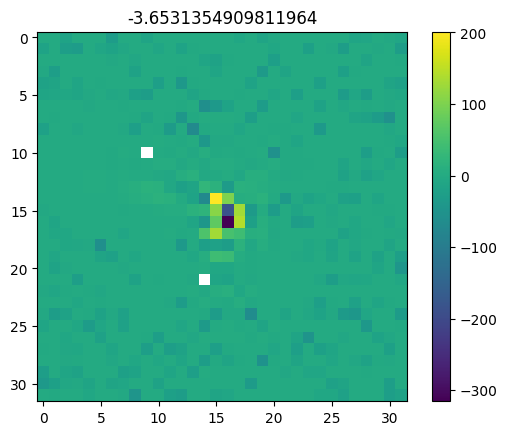

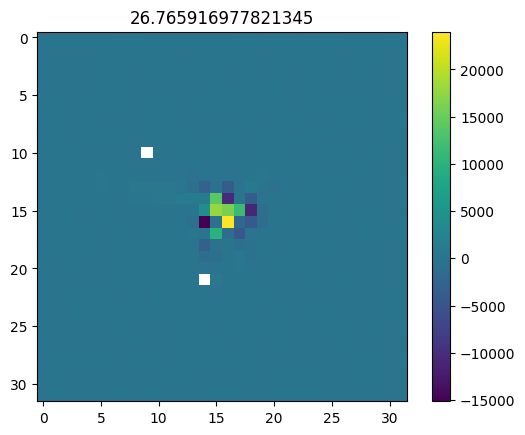

min 0.0 0.0


AttributeError: 'NoneType' object has no attribute 'flatten'

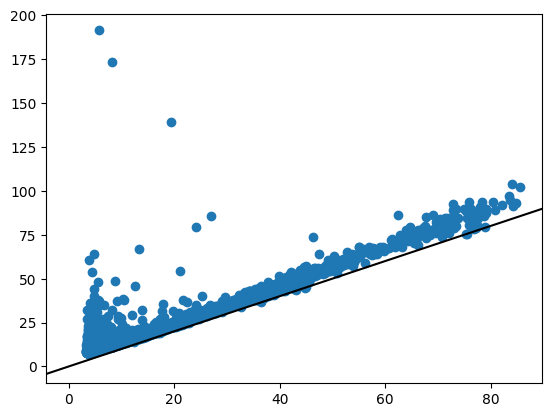

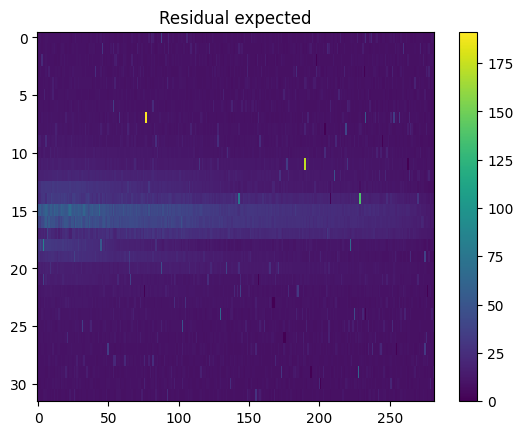

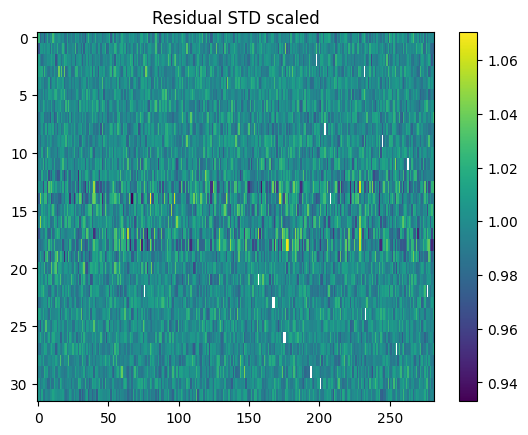

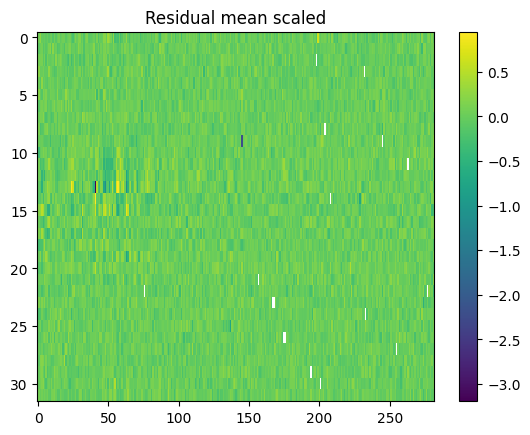

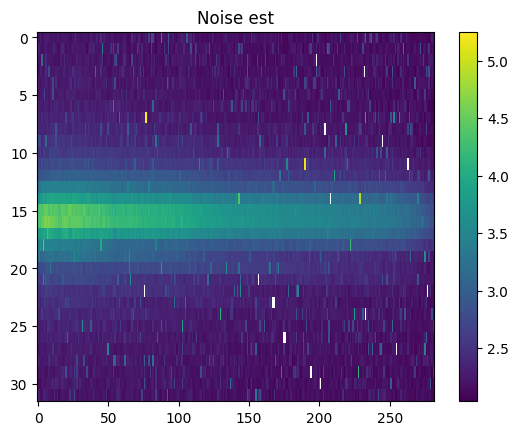

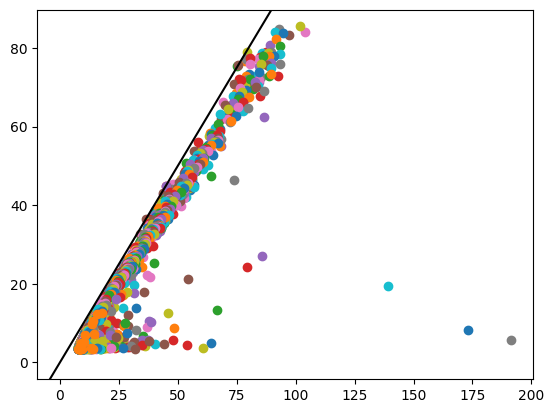

In [12]:
import ariel_load
importlib.reload(ariel_load)
importlib.reload(ariel_load_FGS)
loaders = ariel_load.default_loaders()
loaders[0].cache_steps = []
loaders[1].apply_pixel_corrections.mask_hot = False
d = copy.deepcopy(data[0])
#d.transits = d.transits[1:]
#d.transits[0].observation_number = 1
ariel_load.raw_data_diagnostics(copy.deepcopy(d), 0, loaders)
print(d.transits[0].data[0].data.flatten()[0])

In [ ]:
import ariel_numerics
dd = copy.deepcopy(d)
dd.load_to_step(5, ariel_load.default_loaders())
n1 = ariel_numerics.remove_trend_cp(dd.transits[0].data[1].data).flatten()
n2 = ariel_numerics.remove_trend_cp(dd.transits[1].data[1].data).flatten()
plt.figure()
plt.scatter(n1.get(),n2.get())

In [ ]:
len(data[0].transits)

In [ ]:
len(d.transits)